<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/14Aug2024_SKLEARN_MLPClassifiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHAT THE HECK IS AN MLP?
---
An MLP, or Multilayer Perceptron, is a class of feedforward artificial neural network (ANN). It consists of at least three layers of nodes:
- an input layer,
- one or more hidden layers,
- and an output layer.

Each node, or neuron, in one layer connects with a certain weight to every node in the following layer, making the network fully connected. The nodes in the hidden and output layers use **non-linear activation functions**, which is a key feature that allows MLPs to model complex non-linear relationships between the input features and the target output.

### Key Characteristics of MLPs:

1. **Feedforward Architecture**: Information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any), and to the output nodes. There are no cycles or loops in the network, unlike in recurrent neural networks.

2. **Hidden Layers**: MLPs have one or more hidden layers of nodes between the input and output layers. These hidden layers enable the network to learn deep representations of the data, capturing hierarchies of features at different levels of abstraction.

3. **Non-linear Activation Function**: Neurons in hidden layers and sometimes output layers apply a non-linear activation function to the weighted sum of their inputs. Common choices include the sigmoid, hyperbolic tangent (tanh), and Rectified Linear Unit (ReLU) functions. This non-linearity is what allows MLPs to learn complex patterns.

4. **Backpropagation for Training**: MLPs are typically trained using backpropagation, a supervised learning technique. In backpropagation, the model makes predictions during the forward pass, calculates the error (loss) between the predicted and actual outputs, and then adjusts the weights in reverse (from output back to input) to minimize this error over many iterations or epochs.

5. **Versatility in Applications**: MLPs can be used for a wide range of tasks, including classification, regression, feature learning, and even as components in more complex neural network architectures. They are foundational models in deep learning.

### Use Cases:

- **Classification**: MLPs can classify data into two or more classes, making them useful for tasks like image recognition, spam detection, and medical diagnosis.
- **Regression**: They can predict continuous values, applicable in scenarios like forecasting stock prices or estimating real estate values.
- **Feature Learning**: MLPs can learn to represent complex data in more useful ways, which can then be used for other tasks like clustering or further classification.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -- sklearn imports --
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.neural_network import MLPClassifier



## MLP Model
---

MLPs learn by...

1. **Taking input features**: The model begins with input features that describe each instance in the dataset.

2. **Applying weights to each**: Each input feature is multiplied by a corresponding weight. These weights are parameters the model learns during training.

3. **Summing them up to produce an "activation"**: The weighted inputs are summed together, and a bias term is typically added to this sum. This result is known as the activation.

4. **Passing the "activation" through an activation function**: Unlike the perceptron's step function, modern neural networks often use non-linear activation functions, such as ReLU (Rectified Linear Unit), sigmoid, or tanh. This allows the network to learn complex patterns and non-linear relationships:
    - **ReLU**: Defined as \(f(x) = max(0, x)\), it introduces non-linearity without affecting the scale of positive activations.
    - **Sigmoid**: Defined as \(f(x) = \frac{1}{1 + e^{-x}}\), it squashes the activations to a range between 0 and 1, useful for binary classification.
    - **Tanh**: Defined as \(f(x) = \tanh(x)\), it centers the activations around zero, making it effective in certain contexts.

5. **Producing an "output"**: For binary classification, the final layer often uses a sigmoid activation function to produce an output between 0 and 1, interpreted as the probability of belonging to the positive class. The output is then thresholded (e.g., at 0.5) to produce a binary classification:
    - If output >= 0.5, classify as 1 (positive class).
    - If output < 0.5, classify as 0 (negative class).

6. **Learning from data**: Neural networks learn the optimal weights and biases through a process called backpropagation, where the model's predictions are compared against the true labels, and the error is propagated back through the network to adjust the weights. This process is repeated across many iterations (epochs) over the training data.

7. **Capturing non-linearity and complex interactions**: Through the use of multiple layers (making the network "deep") and non-linear activation functions, neural networks can model complex, non-linear relationships in the data, far beyond what a simple perceptron can achieve.




In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Update the pipeline to include PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scale the
    ('pca', PCA(n_components=2)),  # Reduce to two principal components
    ('neuralnet', MLPClassifier(hidden_layer_sizes=(50,10),
                                max_iter=1000,
                                alpha=1e-4,
                                solver='sgd',
                                verbose=0,
                                tol=1e-4,
                                learning_rate_init=.1,
                                random_state=42))
])

from sklearn.linear_model import LogisticRegression

# Updated pipeline with Logistic Regression
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),  # Scale features to have mean=0 and std=1
    ('pca', PCA(n_components=2)),  # Reduce dimensionality to 2 principal components
    ('logistic', LogisticRegression(max_iter=1000, tol=1e-3, random_state=42))
])


# Train the model using the pipeline
pipeline.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred2 = pipeline2.predict(X_test)



# Evaluate the model
print("MLP pipeline:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")
auc = roc_auc_score(y_test, y_pred)
print(f"Model AUC: {auc:.4f}")

print("Logistic pipeline:")
accuracy = accuracy_score(y_test, y_pred2)
print(f"Model accuracy: {accuracy:.4f}")
auc = roc_auc_score(y_test, y_pred2)
print(f"Model AUC: {auc:.4f}")


MLP pipeline:
Model accuracy: 0.9825
Model AUC: 0.9767
Logistic pipeline:
Model accuracy: 0.9912
Model AUC: 0.9884


# MLP Decision Boundary
---

A decision boundary is a surface that separates data points belonging to different class labels. In the simplest case of a binary classifier, the decision boundary divides the feature space into two regions, one for each class. The classifier uses this boundary to decide the class of new, unseen data points based on which side of the boundary they fall.

### Characteristics of Decision Boundaries:

- **Linear vs. Non-linear**: Decision boundaries can be linear (straight lines or planes) or non-linear (curves, complex surfaces).

- **Dimensionality**: In a two-dimensional feature space, the decision boundary can be visualized as a line. In three dimensions, it becomes a plane.

- **Model Complexity**: Simple models tend to have simpler, often linear, decision boundaries. Complex models, like neural networks, can fit very intricate boundaries that follow the training data closely.


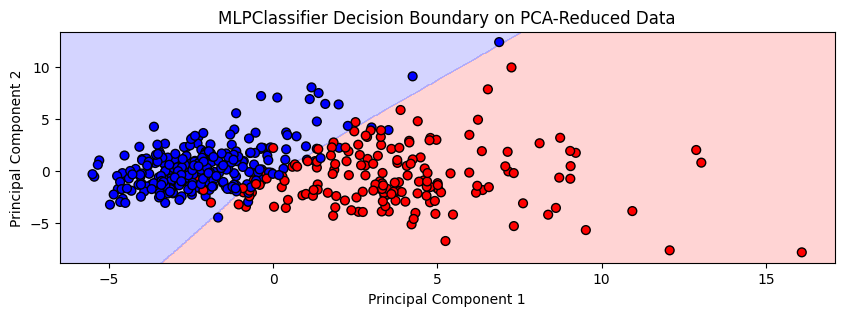

In [3]:
from matplotlib.colors import ListedColormap

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling, then PCA transformation
scaler_transformer = StandardScaler()
X_train_scaled = scaler_transformer.fit_transform(X_train)

pca_transformer = PCA(n_components=2)
X_train_pca = pca_transformer.fit_transform(X_train_scaled)

# Initialize and train the MLPClassifier on the PCA-reduced data
clf = MLPClassifier(hidden_layer_sizes=(10,50,), max_iter=1000, alpha=1e-4, solver='sgd', verbose=0, tol=1e-4, random_state=1, learning_rate_init=.1)
clf.fit(X_train_pca, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 3))

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=500), np.linspace(y_min, y_max, num=500))

# Predict on the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
background_cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])
scatter_cmap = ListedColormap(['#FF0000', '#0000FF'])
plt.contourf(xx, yy, Z, alpha=0.5, cmap=background_cmap)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=scatter_cmap, edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MLPClassifier Decision Boundary on PCA-Reduced Data')
plt.show()


## Logistic

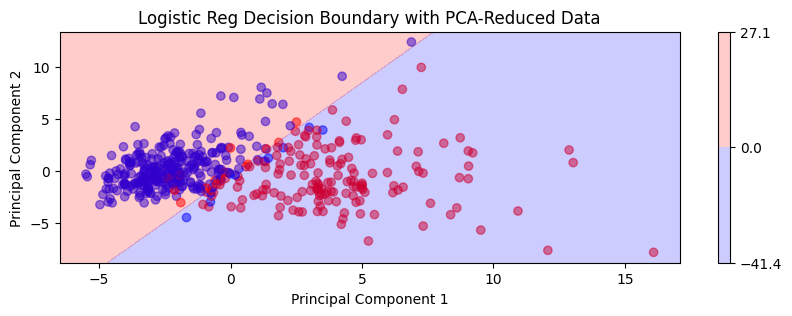

In [4]:
# extract the first two steps of the pipeline
pca_transformer = pipeline.named_steps['pca']
scaler_transformer = pipeline.named_steps['scaler']

# Apply scaling, then PCA transformation
X_train_scaled = scaler_transformer.transform(X_train)
X_train_pca = pca_transformer.transform(X_train_scaled)

# Now, X_train_pca is defined and can be used for plotting
plt.figure(figsize=(10, 3))
background_cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])
scatter_cmap = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=scatter_cmap, alpha=0.5)


# Plot the decision boundary
w = pipeline2.named_steps['logistic'].coef_[0]
b = pipeline2.named_steps['logistic'].intercept_[0]
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# The decision function is based on the dot product of W and X + b
# Adjusting for the PCA-transformed 2D space
z = (w[0] * xx + w[1] * yy + b)


plt.contourf(xx, yy, z, levels=[z.min(), 0, z.max()], alpha=0.2, colors=['blue', 'red'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Reg Decision Boundary with PCA-Reduced Data')
plt.colorbar()
plt.show()